# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc
plt.style.use('ggplot')

## Data Validation

**Summary of Data Validation and Cleaning Steps**

The following validation and cleaning steps were performed for each column in the dataset:

1. **`recipe`**:  
   - Verified as a unique identifier column with no missing values. No cleaning required.

2. **`calories`, `carbohydrate`, `sugar`, `protein`** (Numeric Columns):  
   - Found 52 missing values in each column.  
   - Missing values were imputed using the **median** to handle outliers and preserve the distribution.

3. **`category`** (Categorical Column):  
   - Identified 11 unique categories, including redundancy between `Chicken` and `Chicken Breast`.  
   - Combined `Chicken Breast` with `Chicken` to reduce redundancy, resulting in 10 unique categories.

4. **`servings`** (Categorical Column with Numeric Values):  
   - Found descriptive entries such as `'4 as a snack'` and `'6 as a snack'`.  
   - Replaced these with numeric equivalents (`4`, `6`) and converted the column to integers.

5. **`high_traffic`** (Categorical Column):  
   - Found 373 missing values.  
   - Filled missing values with `'Low'`, assuming low traffic is the default behavior.

6. **Final Dataset Check**:  
   - Verified that all columns had valid data types and no missing values remained.  
   - Descriptive statistics were reviewed for numeric columns to confirm data consistency and reasonableness.

These steps ensured that the data is clean, consistent, and ready for exploratory analysis and modeling.


**Display First 5 Rows of the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# Check dataset shape
df.shape

(947, 8)

**Shape of the Dataset** \
Number of Rows: 947 \
Number of Columns: 8

In [4]:
# Inspect the data types each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


**Data Type of Each Column** \
Numeric columns: `calories`, `carbohydrate`, `sugar`, `protein`. \
Categorical columns: `category`, `servings`, `high_traffic`. \
Identifier column: `recipe`.

**Check for Missing Values**

In [5]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

52 missing values in each `calories`, `carbohydrate`, `sugar`, `protein`. \
373 missing values in `high-traffic`.

In [6]:
# Impute missing values in numeric columns using the median
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Impute missing values in Numeric Columns with their median values to preserce distribution and handle outliers.

**Verify Imputation in Numeric Columns**

In [7]:
# Verify imputation of missing values in numeric columns
df.isnull().sum()

recipe            0
calories          0
carbohydrate      0
sugar             0
protein           0
category          0
servings          0
high_traffic    373
dtype: int64

**Inspect and Clean `category` Column**

In [8]:
# Check the unique values in 'category' and their counts
display(df['category'].unique())
display(df['category'].value_counts(dropna=False))

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

Redundant categories (`Chicken` and `Chicken Breast`) were identified.

Combine `Chicken Breast` with `Chicken` to reduce redundancy and maintain consistency.

In [9]:
# Combine 'Chicken Breast' and 'Chicken' into a single category to reduce redundancy
df['category'] = df['category'].replace({'Chicken Breast':'Chicken'})

**Verify Changes in `category` Column**

In [10]:
# Verify the changes in the 'category' column
display(df['category'].unique())
display(df['category'].value_counts(dropna=False))

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

category
Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: count, dtype: int64

**Inspect and Clean `servings` Column**

In [11]:
# Check the unique values in 'servings' and their counts
display(df['servings'].unique())
display(df['servings'].value_counts(dropna=False))

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

Unusual values in the `servings` column (`'4 as a snack'`, `'6 as a snack'`) were identified.

Check records with unusual `servings` values.

In [12]:
# Check records with unusual 'servings' values for further inspection
df[df['servings'].isin(['4 as a snack','6 as a snack'])]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
451,452,1542.53,14.73,5.71,29.92,Lunch/Snacks,4 as a snack,High
548,549,1440.69,30.59,5.78,30.63,Lunch/Snacks,6 as a snack,High
735,736,513.75,65.87,18.63,18.39,Lunch/Snacks,4 as a snack,NaN


Standardize and convert the `servings` column into integers for consistency.

In [13]:
# Replace descriptive entries with numeric values and convert 'servings' to integer
df['servings'] = df['servings'].replace({'4 as a snack':'4', '6 as a snack':'6'}).astype(int)

**Verify Changes in `servings` Column**

In [14]:
# Verify the changes in the 'servings' column
display(df['servings'].dtype)
display(df['servings'].unique())
display(df['servings'].value_counts(dropna=False))

dtype('int32')

array([6, 4, 1, 2])

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

**Inspect and Handle Missing Values in `high_traffic` Column**

In [15]:
# Check unique values in 'high_traffic' and their counts
display(df['high_traffic'].unique())
display(df['high_traffic'].value_counts(dropna=False))

array(['High', nan], dtype=object)

high_traffic
High    574
NaN     373
Name: count, dtype: int64

Fill missing values in `high_traffic` with `Low`, assuming this is the default behavior.

In [16]:
# Replace missing 'high_traffic' values with 'Low' to ensure no missing values
df['high_traffic'] =  df['high_traffic'].fillna('Low')

**Verify Changes in `high_traffic` Column**

In [17]:
# Verify the changes in 'high_traffic'
display(df['high_traffic'].unique())
display(df['high_traffic'].value_counts(dropna=False))

array(['High', 'Low'], dtype=object)

high_traffic
High    574
Low     373
Name: count, dtype: int64

**Verify Dataset After Cleaning**

In [18]:
# Review the dataset info after transformations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      947 non-null    float64
 2   carbohydrate  947 non-null    float64
 3   sugar         947 non-null    float64
 4   protein       947 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    int32  
 7   high_traffic  947 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 55.6+ KB


In [19]:
# View dataset after preprocessing and validation
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,Low
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,Low


Data types and non-null values are now correct for all columns. \
Numeric columns: `calories`, `carbohydrate`, `sugar`, `protein`, `servings`. \
Categorical columns: `category`, `high_traffic`. \
Identifier column: `recipe`.

**Summary Statistics for Numeric Columns**

In [20]:
# Display summary statistics for numeric columns
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,427.846019,34.323464,8.799641,23.416283,3.477297
std,273.519652,441.673556,42.836191,14.306785,35.486699,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,2.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,710.500000,576.225000,42.590000,9.285000,28.530000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


## Exploratory Analysis

### Single Variable Analysis

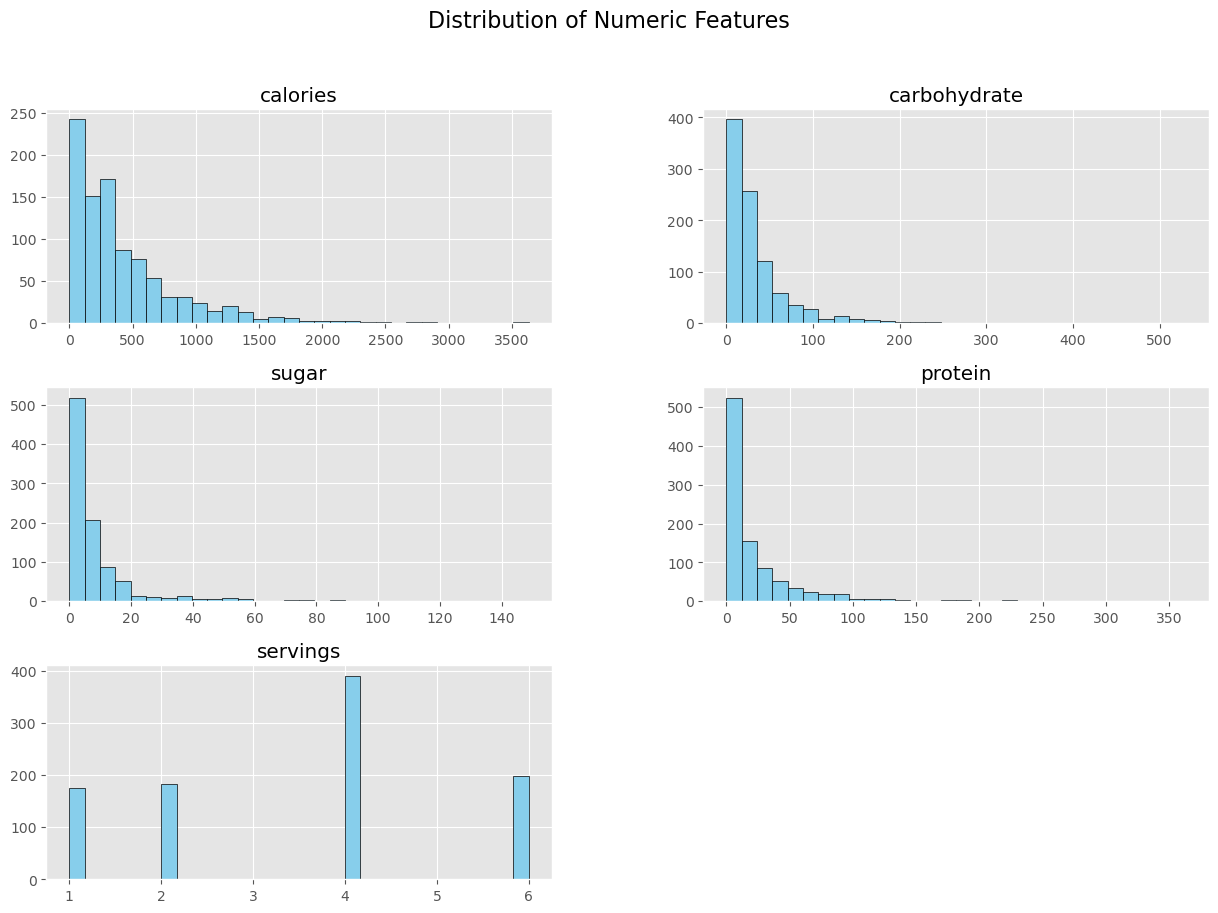

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\3275381034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


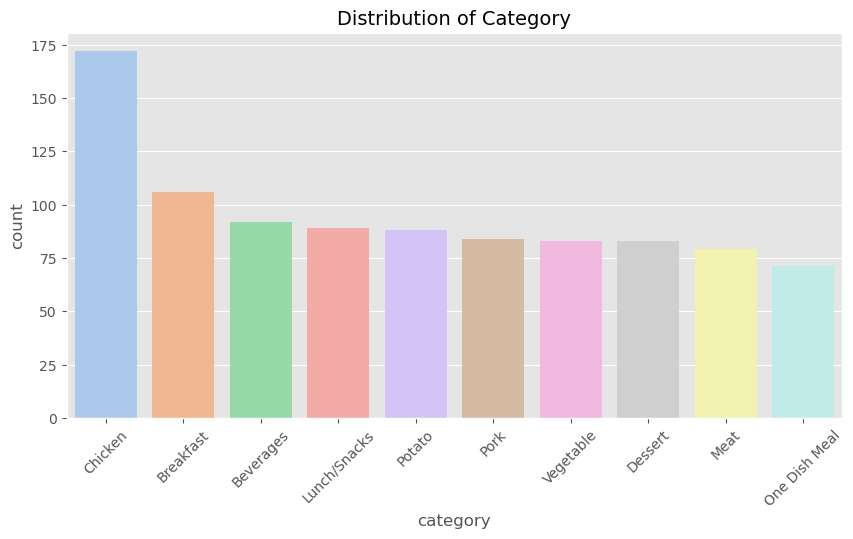

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\3275381034.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)


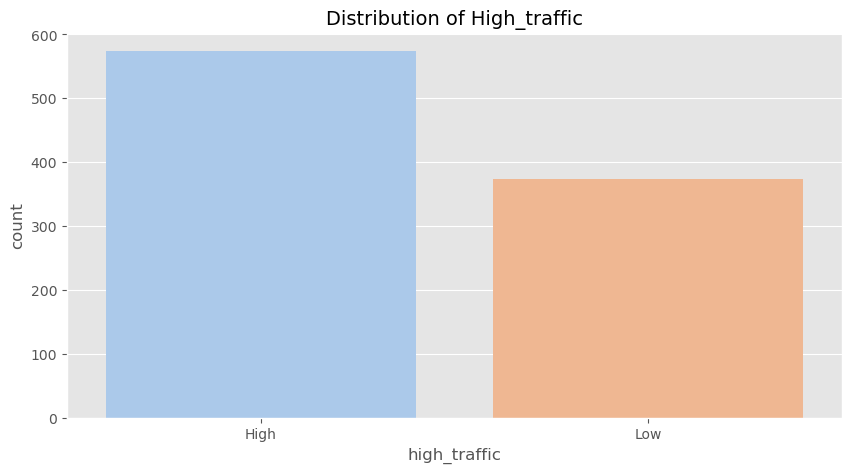

In [21]:
# Numeric features: Histograms
numeric_cols = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
df[numeric_cols].hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.show()

# Categorical features: Bar plots
categorical_cols = ['category', 'high_traffic']
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='pastel', order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.capitalize()}', fontsize=14)
    plt.xticks(rotation=45 if col == 'category' else 0)
    plt.show()

**Numeric Features:**
- The distributions of `calories`, `carbohydrate`, `sugar`, and `protein` are positively skewed, with most recipes having lower values for these features and a few recipes having significantly high values (potential outliers).
- `Servings` has the majority of recipes with 4 servings, while 1, 2, and 6 servings are less common. Notably, there are no recipes with 3 servings or 5 servings.

**Categorical Features:**
- `Category` distribution is not entirely balanced. `Chicken` is significantly more prevalent than all other categories. Other categories, like `One Dish Meal`, have noticeably fewer recipes.
- `High Traffic` shows an imbalance, with fewer recipes marked as "High" traffic compared to the "Low" traffic category.

### Analyzing Relationships

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1638897340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')


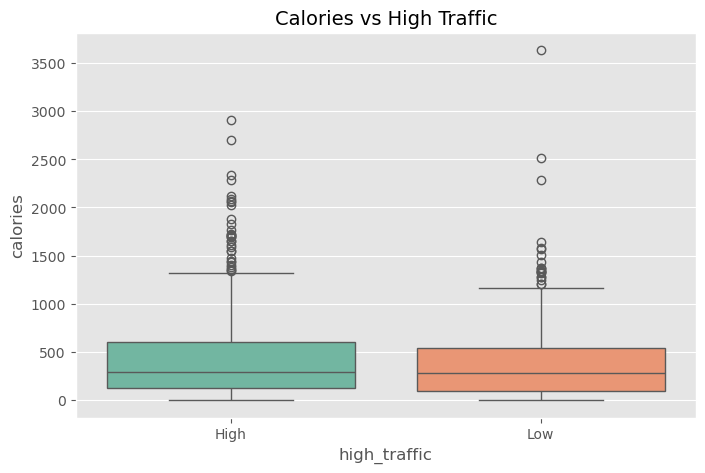

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1638897340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')


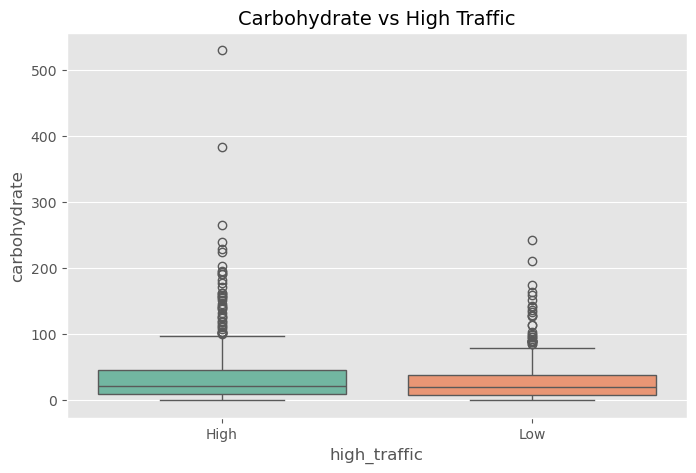

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1638897340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')


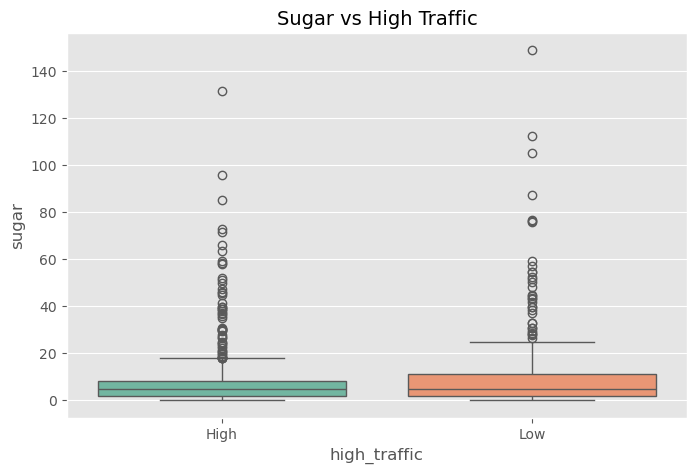

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1638897340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')


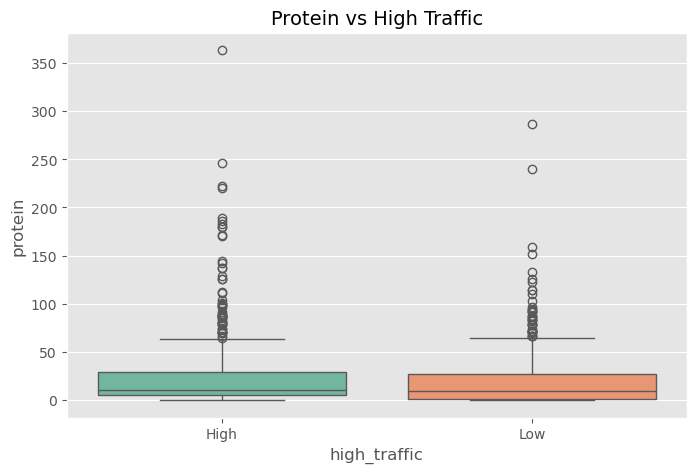

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1638897340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')


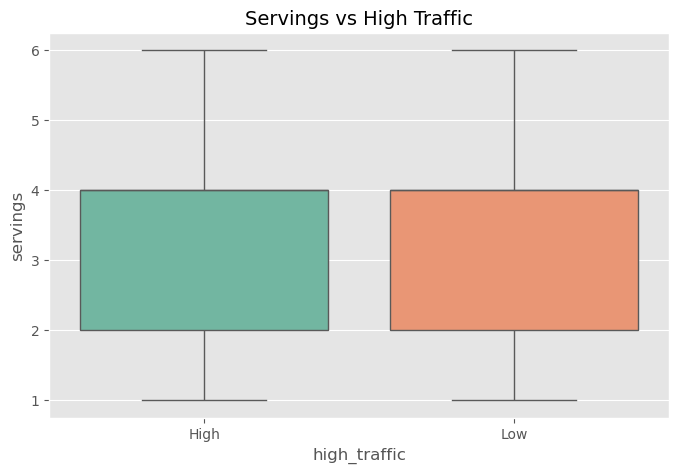

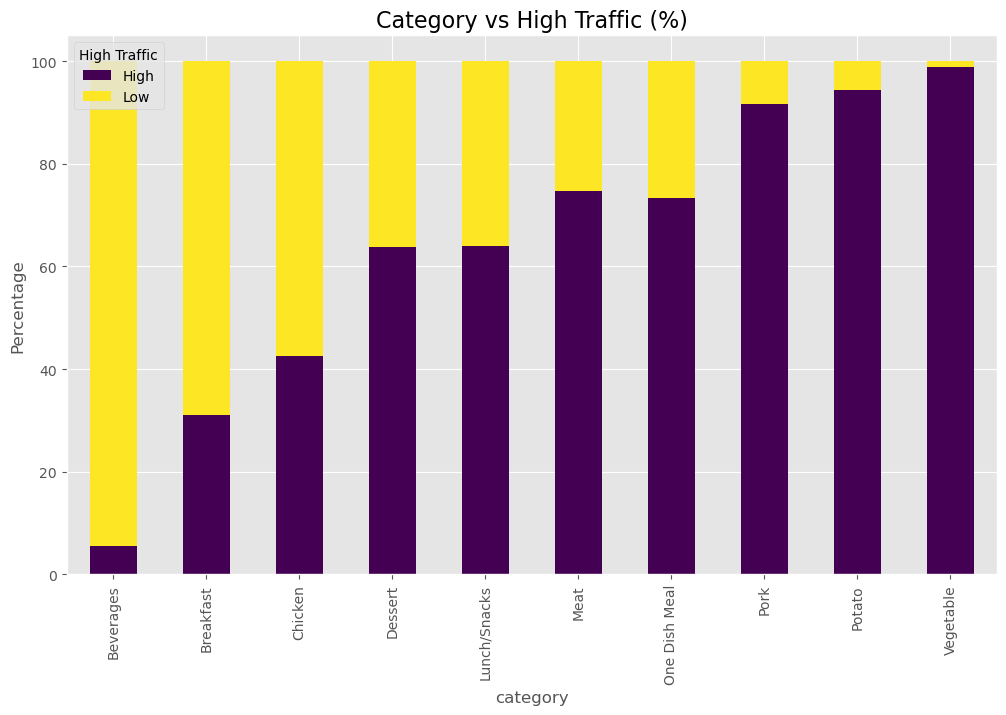

In [22]:
# Boxplots for numeric features vs. 'high_traffic'
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='high_traffic', y=col, palette='Set2')
    plt.title(f'{col.capitalize()} vs High Traffic', fontsize=14)
    plt.show()

# Stacked bar chart for 'category' vs. 'high_traffic'
category_traffic = pd.crosstab(df['category'], df['high_traffic'], normalize='index') * 100
category_traffic.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
plt.title('Category vs High Traffic (%)', fontsize=16)
plt.ylabel('Percentage')
plt.legend(title='High Traffic')
plt.show()

**Boxplots (Numeric Features vs. High Traffic):**
- **Calories**: Recipes with higher `calories` tend to have more variability in traffic, but high-calorie recipes do not necessarily correlate with high traffic.
- **Carbohydrate and Sugar:** These features show a slight tendency for higher values in "High" traffic recipes, but the overlap between "High" and "Low" traffic is significant.
- **Protein:** High-protein recipes show no distinct trend with traffic.
- **Servings:** The number of servings does not seem to have a noticeable effect on whether a recipe generates "High" or "Low" traffic. The distribution for both traffic levels is very similar.

**Category vs. High Traffic (Stacked Bar Chart):**
- Categories like `Vegetable`, `Potato`, `Pork`, `One Dish Meal`, and `Meat` have the highest percentage of recipes generating "High" traffic, as indicated by the larger purple sections.
- Categories like `Beverages`, `Breakfast`, and `Chicken` tend to generate less "High" traffic, with most recipes in these categories falling under the "Low" traffic label.

### Correlation Analysis

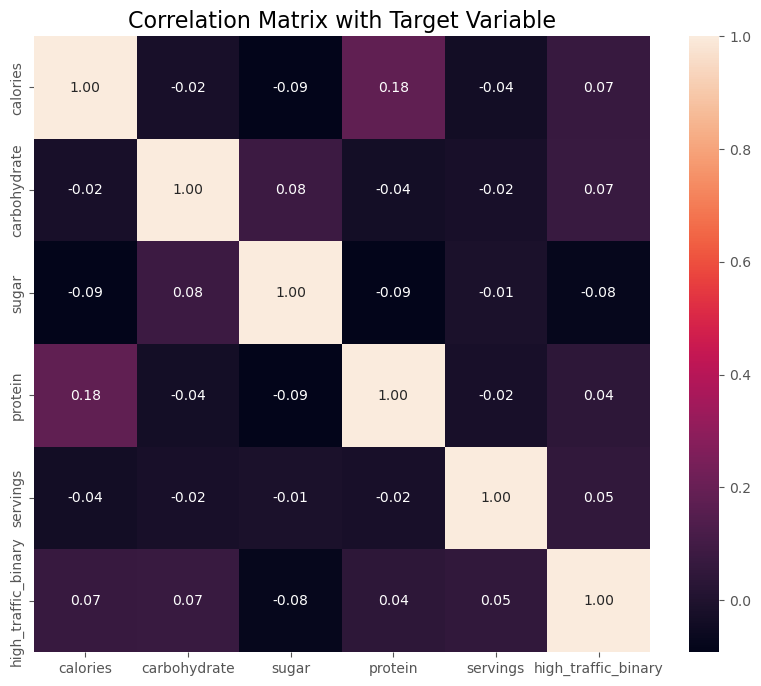

In [23]:
# Convert the target variable 'high_traffic' into a numeric binary variable
df['high_traffic_binary'] = df['high_traffic'].map({'High': 1, 'Low': 0})

# Add the binary target variable 'high_traffic_binary' to the list of numeric columns
numeric_cols_with_target = numeric_cols + ['high_traffic_binary']

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols_with_target].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Correlation Matrix with Target Variable', fontsize=16)
plt.show()

**Correlation Heatmap Insights:**
- There is a weak positive correlation (0.07 to 0.17) between `calories` and `protein`, as well as between `calories` and `high_traffic_binary`, suggesting a slight relationship between these features and the target variable.
- `Carbohydrate` shows no meaningful correlation with other features or `high_traffic_binary`, indicating it might not significantly influence traffic generation.
- Weak to negligible correlations are observed among all numeric features, confirming minimal multicollinearity in the dataset.
- No strong correlation exists between numeric features and `servings` or `high_traffic_binary`, implying that `servings` and other numeric features may have limited predictive power for traffic generation..

## Model Development

1. **Problem Type**:  
   This is a **binary classification problem** where the goal is to predict whether a recipe generates **"High Traffic"** or **"Low Traffic"**. The target variable is `high_traffic_binary`, which was derived by mapping `High` to `1` and `Low` to `0`.

2. **Model Selection Rationale**:  
   Two models were selected for development to address the classification problem:  
   
   - **Logistic Regression**:  
     - Chosen for its simplicity, interpretability, and robustness in binary classification. 
     - Provides clear insights into feature importance, allowing us to identify which features contribute most to high traffic.  
     - Efficient to train and performs well on datasets with linear separability or near-linear relationships.  
   
   - **Random Forest**:  
     - Chosen for its ability to model complex, non-linear relationships.  
     - Handles categorical and numerical data effectively and is robust to overfitting due to its ensemble nature.  
     - Provides feature importance scores, which can be used to understand how different features influence predictions.

By selecting these models, the goal was to balance interpretability and performance, leveraging Logistic Regression for its simplicity and Random Forest for its capability to model non-linear interactions in the data.

### Data Preparation

In [24]:
# Encode categorical variable 'category' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['category'], drop_first=True)

In [25]:
# Define features and target variable
X = df_encoded.drop(columns=['high_traffic', 'high_traffic_binary', 'recipe'])  # Drop target and ID columns
y = df_encoded['high_traffic_binary']

In [26]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Model Training

In [27]:
# Fine-tuning Logistic Regression

# Logistic Regression parameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization types
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers compatible with penalties
}

# GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid=lr_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best AUC-ROC for Logistic Regression:", lr_grid_search.best_score_)

# Train the tuned Logistic Regression model
tuned_logistic_model = lr_grid_search.best_estimator_
tuned_logistic_model.fit(X_train, y_train)

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC-ROC for Logistic Regression: 0.8221278083253027


c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [28]:
# Fine-tuning Random Forest

# Random Forest parameter grid
rf_param_grid = {
    'n_estimators': [100, 150, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features considered for the best split
    'criterion': ['gini', 'entropy'],          # Splitting criterion
}

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit the grid search
rf_grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best AUC-ROC for Random Forest:", rf_grid_search.best_score_)

# Train the tuned Random Forest model
tuned_rf_model = rf_grid_search.best_estimator_
tuned_rf_model.fit(X_train, y_train)

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1152 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\admin\anaconda3\Lib\site-pac

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC for Random Forest: 0.8087858978407982


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

### Feature Importance

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\1620255387.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lr_feature_importance, x='Feature', y='Importance', palette='viridis')


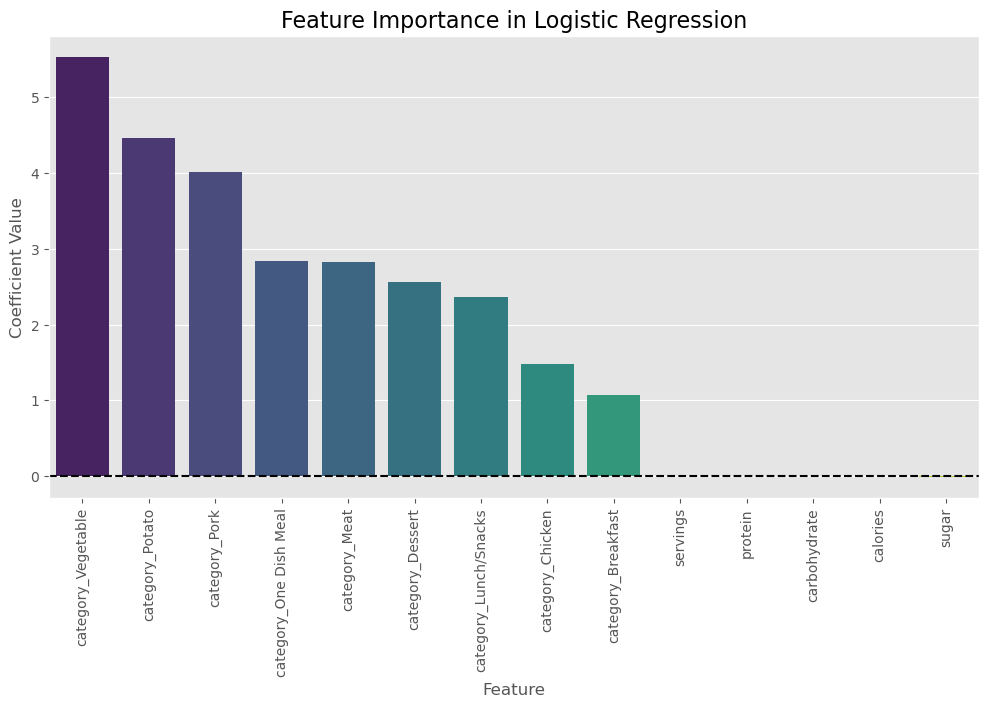

In [29]:
# Logistic Regression Feature Importance

# Extract feature names and coefficients
lr_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tuned_logistic_model.coef_[0]  # Coefficients for the first class (binary logistic regression)
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=lr_feature_importance, x='Feature', y='Importance', palette='viridis')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at 0
plt.title('Feature Importance in Logistic Regression', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_18848\3878012014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_feature_importance, x='Feature', y='Importance', palette='viridis')  # Match the palette


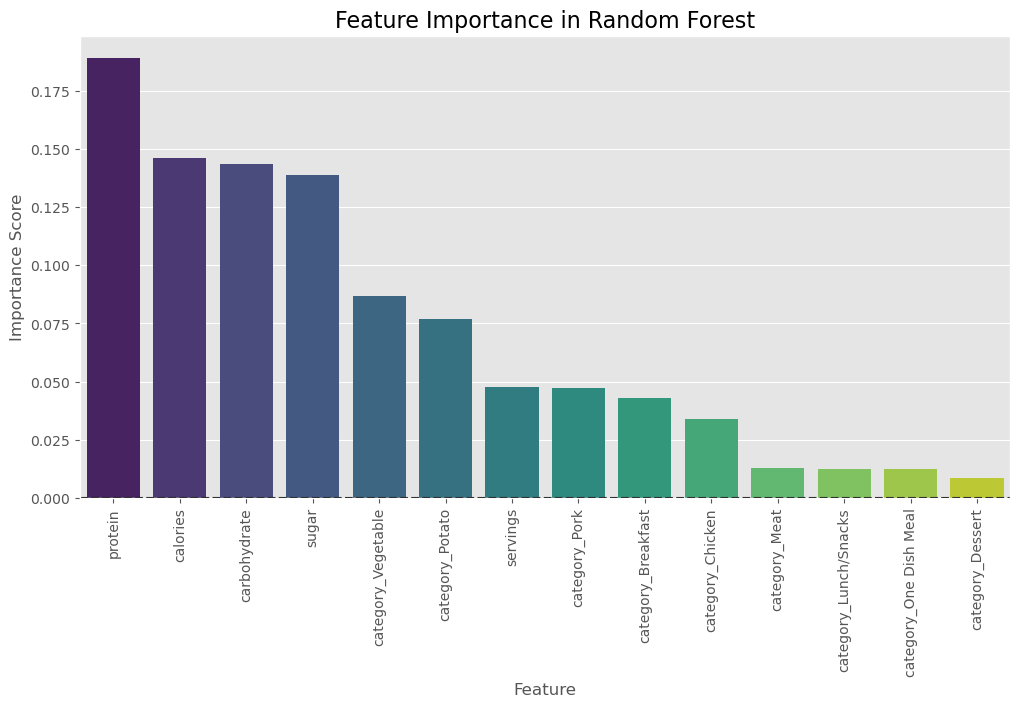

In [30]:
# Random Forest Feature Importance

# Extract feature importances and feature names
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tuned_rf_model.feature_importances_  # Extract feature importance values
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=rf_feature_importance, x='Feature', y='Importance', palette='viridis')  # Match the palette
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at 0, for consistency (not necessary in Random Forest but for aesthetics)
plt.title('Feature Importance in Random Forest', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=90)  # Rotate feature names for better visibility
plt.show()

## Model Evaluation

### Evaluation for Baseline Model - Logistic Regression

In [31]:
# Evaluate Tuned Logistic Regression
tuned_lr_predictions = tuned_logistic_model.predict(X_test)
tuned_lr_proba = tuned_logistic_model.predict_proba(X_test)[:, 1]

print("Tuned Logistic Regression:")
print(classification_report(y_test, tuned_lr_predictions))
print(f"Tuned Logistic Regression AUC-ROC: {roc_auc_score(y_test, tuned_lr_proba)}")

Tuned Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        75
           1       0.85      0.77      0.80       115

    accuracy                           0.77       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.78      0.77      0.78       190

Tuned Logistic Regression AUC-ROC: 0.864927536231884


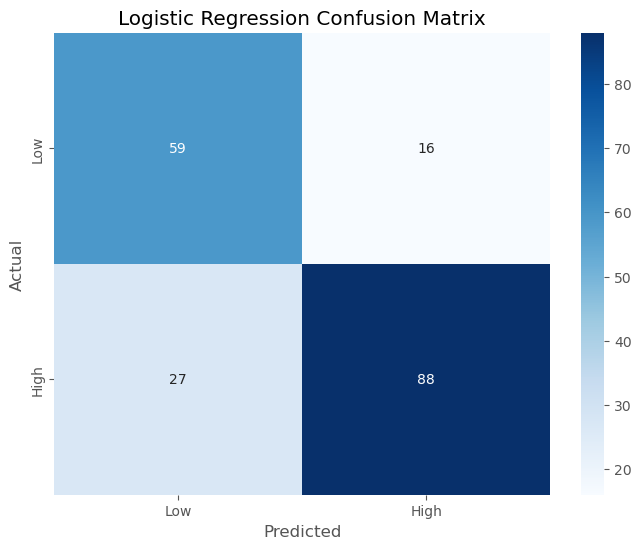

In [32]:
# Confusion Matrix for Logistic Regression
baseline_cm = confusion_matrix(y_test, tuned_lr_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(baseline_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

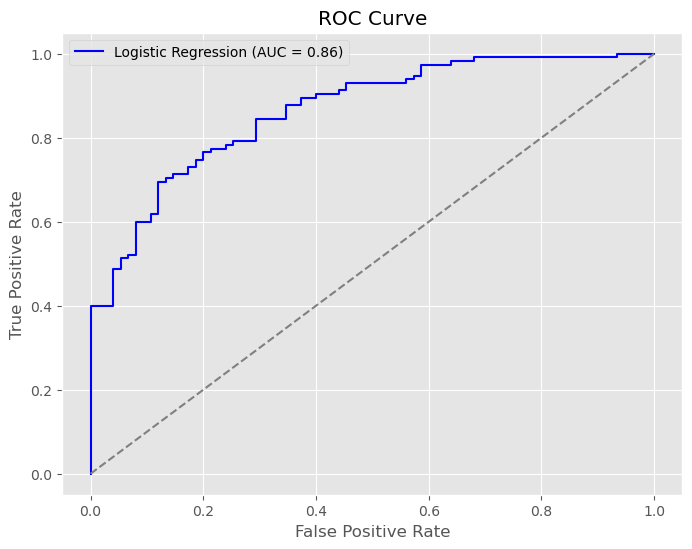

In [33]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, tuned_lr_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

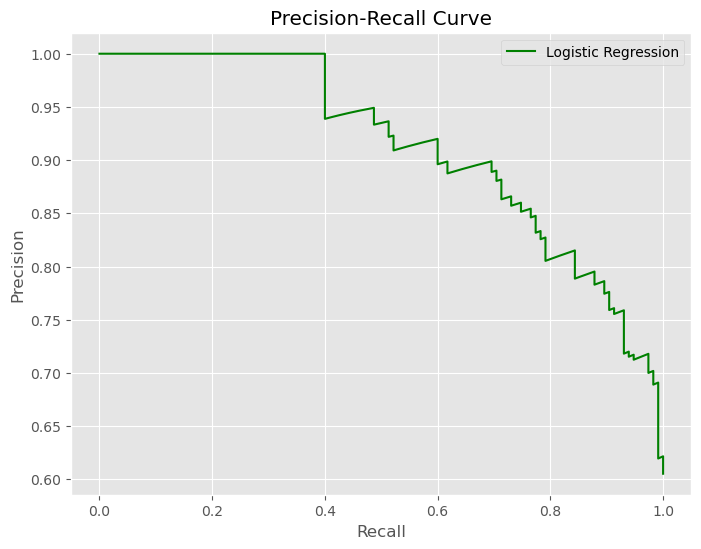

In [34]:
# Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, tuned_lr_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### Evaluation for Comparison Model - Random Forest

In [35]:
# Evaluate Tuned Random Forest
tuned_rf_predictions = tuned_rf_model.predict(X_test)
tuned_rf_proba = tuned_rf_model.predict_proba(X_test)[:, 1]

print("Tuned Random Forest:")
print(classification_report(y_test, tuned_rf_predictions))
print(f"Tuned Random Forest AUC-ROC: {roc_auc_score(y_test, tuned_rf_proba)}")

Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        75
           1       0.82      0.77      0.80       115

    accuracy                           0.76       190
   macro avg       0.75      0.76      0.76       190
weighted avg       0.77      0.76      0.76       190

Tuned Random Forest AUC-ROC: 0.840231884057971


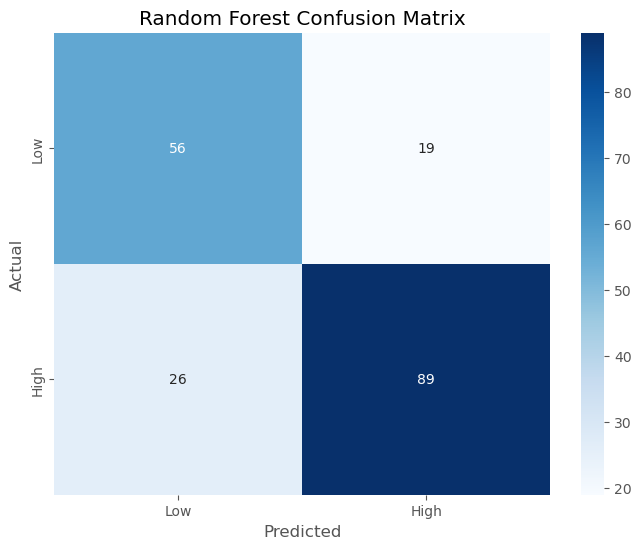

In [36]:
# Confusion Matrix for Random Forest
comparison_cm = confusion_matrix(y_test, tuned_rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

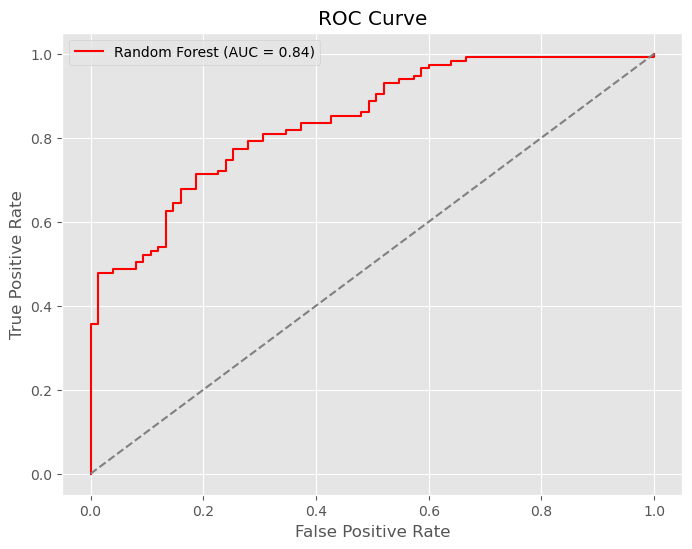

In [37]:
# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, tuned_rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

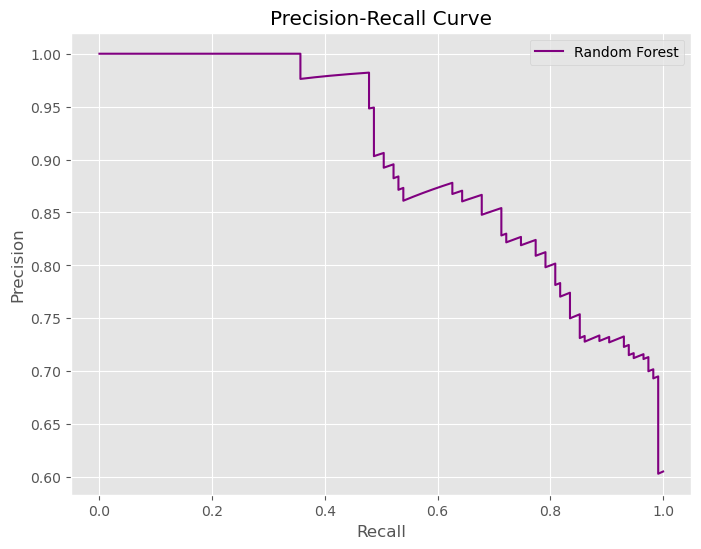

In [38]:
# Precision-Recall Curve for Random Forest
precision, recall, _ = precision_recall_curve(y_test, tuned_rf_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Results

The **AUC-ROC** of the Logistic Regression model and the Random Forest model is **0.86** and **0.84**, meaning the **Logistic Regression model predicts high and low traffic better overall.** 

The **precision** of the Logistic Regression model and the Random Forest model for predicting high traffic is **85%** and **82%**, respectively, showing that **Logistic Regression is slightly more precise in identifying high-traffic recipes.**

The **recall** of the Logistic Regression model and the Random Forest model for high traffic is **77%** and **77%**, meaning both models are equally effective in capturing high-traffic recipes from the dataset.

Feature importance analysis revealed key distinctions:
- **Logistic Regression** relies heavily on **category-based features** such as `category_Vegetable`, `category_Potato`, and `category_Pork`, which dominate the model's predictions. Numerical features like `protein` and `calories` are near-zero in importance, indicating minimal influence.
- **Random Forest**, in contrast, prioritizes **numerical features** such as `protein`, `calories`, and `carbohydrate`, while category-based features like `category_Vegetable` and `category_Potato` play a secondary role in determining predictions.

This distinction underscores how the two models leverage different aspects of the dataset to make predictions, with Logistic Regression favoring categorical predictors and Random Forest emphasizing numerical variables.

## Business Metrics

### Define a Way to Compare Model Performance to the Business
**Business Context**

The goal is to predict high-traffic recipes to increase visibility and potentially drive more user engagement or revenue. Therefore, the following business metrics are relevant:

**1. Accuracy of High-Traffic Prediction**
- orrectly identifying recipes that generate "High Traffic" is critical. False negatives (recipes predicted as "Low Traffic" but are actually "High Traffic") can lead to missed business opportunities.

**2. Precision**
- Precision measures how many recipes predicted as "High Traffic" are truly high-traffic. High precision means fewer resources are wasted promoting low-traffic recipes.

**3. Recall**
- Recall measures how many of the actual high-traffic recipes are identified. High recall ensures that most high-traffic recipes are selected, which is crucial for maximizing engagement.

**4. AUC-ROC**
- AUC-ROC captures the trade-off between sensitivity (recall) and specificity, ensuring a good balance in model predictions.

**5. Potential Revenue Impact (Hypothetical)**
- Assign an average revenue or engagement boost for every correctly identified high-traffic recipe and compare it against misclassified low-traffic recipes.


### Describe How the Models Perform Using Business Metrics
Using the evaluation results from **Model Evaluation**, we can compare the models based on their ability to meet business goals.

**Model Metrics Recap**
|          Metric          | Logistic Regression | Random Forest |
|--------------------------|---------------------|---------------|
| Precision (High Traffic) |         85%         |      82%      |
| Recall (High Traffic)    |         77%         |      77%      |
| AUC-ROC                  |         0.86        |      0.84     |
| Accuracy                 |         77%         |      76%      |

**Insights** 
- **Logistic Regression** 
  - Slightly higher **precision (85%)** means fewer low-traffic recipes are mistakenly predicted as high-traffic, saving business resources.
  - Equal **recall (77%)** as Random Forest ensures both models capture a similar number of actual high-traffic recipes.
  - Higher **AUC-ROC (0.86)** suggests Logistic Regression performs better overall at distinguishing between high and low traffic.
- **Random Forest** 
  - Although it has slightly lower precision, Random Forest emphasizes numerical features like `protein` and `calories`. This might make it more effective if recipe nutrition heavily impacts traffic trends.

**Example of a Business Metric: Revenue Impact**
Hypothetically, if every correctly identified high-traffic recipe generates an average revenue boost of \$100, and false positives cost \$20 each due to wasted promotion:
- **Logistic Regression**
  - Correctly identifies 88 high-traffic recipes -> $8,800 revenue.
  - 16 false positives -> $320 cost.
  - **Net Revenue:** $8,480.

This metric confirms that both models perform similarly, but **Logistic Regression slightly edges out Random Forest in terms of cost efficiency and precision.**

**Conclusion**
- **Logistic Regression** is preferable for the business due to its higher precision and cost-effectiveness in promoting high-traffic recipes.
- The business can focus on deploying this model and monitoring the precision and recall metrics to ensure its predictions remain reliable over time.

## Summary and Recommendations

**Summary**

**1. Business Objective** \
The goal of this project was to develop a predictive model to identify recipes likely to generate **high traffic**, enabling the business to allocate resoureces more effectively and promote the right recipes.

**2. Key Findings** 
- **Data Insights**
  - High-traffic recipes are influenced more by **category features** in Logistic Regression and by **nutritional features (protein, calories, etc.)** in Random Forest.
  - Categories like `Vegetable`,`Potato`, and `Pork` consistently drive higher traffic compared to categories like `Breakfast` or `Beverages`.
- **Model Performance**
  - **Logistic Regression** slightly outperformed **Random Forest** in **precision (85%)**, ensuring fewer low-traffic recipes were misclassified as high-traffic, and had the highest AUC-ROC score of **0.86**.
  - Both models achieved equal recall of **77%**, capturing the same proportion of high-traffic recipes.

**3. Business Metric Results**
- **Logistic Regression** provided better **net revenue impact** in the hypothetical example due to its higher precision, ensuring fewer wasted promotional resources.

**Recommendations**

**1. Deploy the Logistic Regression Model**
- Its higher precision makes it more cost-effective for identifying high-traffic recipes, reducing wasted resources.
- This model's reliance on categorical features simplifies interpretability and helps the business easily understand which categories drive traffic.

**2. Feature Analysis**
- Focus marketing efforts on **high-performing categories** like `Vegetable`,`Potato`, and `Pork`, which are strongly associated with high traffic.
- Leverage nutritional features (e.g., high-protein recipes) for Random Forest's insights, as they might offer additional strategies for specific audiences.

**3. Continuous Monitoring**
- Regularly monitor **precision, recall, and AUC-ROC** metrics post-deployment to ensure the model continues to perform effectively as new recipes are introduced.
- Periodically retrain the model with updated data to maintain accuracy and relevance.

**4. Revenue Optimization**
- Use the model predictions to prioritize promotional resources (e.g., homepage placement, ads) for recipes classified as high-traffic.
- Test different strategies for promoting low-traffic catagories like `Beverages` or `Breakfast` to uncover hidden opportunities.

**5. Future Enhancements**
- Explore advanced models, such as **Gradient Boosting** of **Neural Networks**, if the business requires higher performance in recall or traffic prediction.
- Investigate external data, such as seasonal trends or user demographics, to further enhance prediction accuracy.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation